In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math
from scipy import linalg as LA

### H5.1: Cross-validation
The file TrainingRidge.csv contains the training set, with 200 observations and corre-
sponding target values (ground truth/labels) {(x(α),y(α))}. The two input variables for each T
observation $ x^\alpha\ = ( x1^\alpha\ , x2^\alpha\ )^T $ appear in the first 2 columns. The target values y(α) appear in
the last column.

The data contained in the second file ValidationRidge.csv serves as the validation set.
It follows the same format as above. The validation set contains 1476 pairs {(x(β), y(β))}. The
values of $ x^\beta\ = ( x1^\beta\ , x2^\beta\ )^T $ form a 36 × 41 grid in input space.

#### Teil A

x_train: (200, 2)
x_train_centered: (200, 2)
C: (2, 2)
λ: (2, 2)
E: (2, 2)
x_train_decorrelated: (2, 200)
x_train_sphered: (2, 200)


/var/folders/qg/bvmbx8kx66v9dn0hmz5f07780000gq/T/ipykernel_3213/779338610.py:36: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


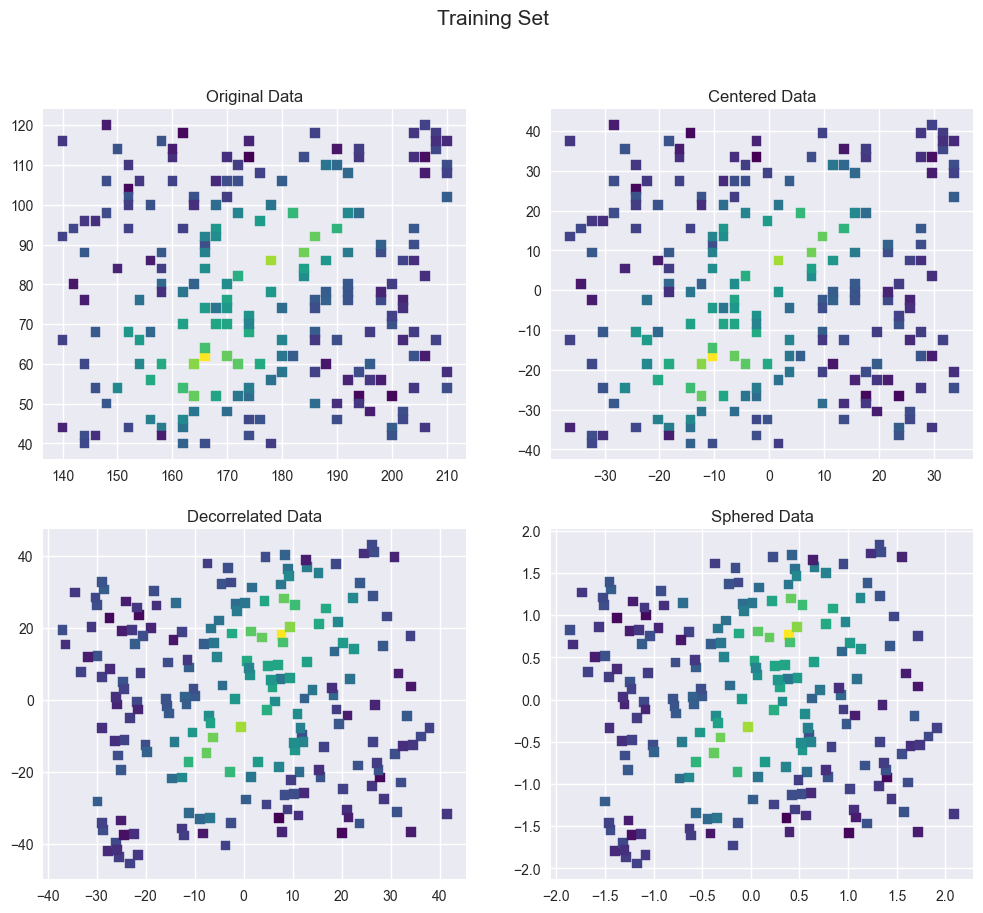

x_train_sphered mean: [0. 0.]
x_train_spheredstd: [1. 1.]


In [22]:
# Training Set 

data_train = np.genfromtxt('Data/Exercise_5/TrainingRidge.csv', delimiter=',',dtype=float, skip_header=1)
x_train = data_train[:,0:2]
yT_train = data_train[:,2]

#Centering the data
x_train_centered = x_train - np.mean(x_train, axis=0)  

#Convolving the data
C = np.cov(x_train_centered, rowvar=False) #nxn matrix

#Computing the eigenvalues and eigenvectors

λ, E = LA.eig(C) #eigenvalues are sorted in ascending order (eigenvalues/eigenvectors are sorted by column)
#diagonal matrix of eigenvalues
λ = np.diag(1/np.sqrt(λ))
λ = λ.real.round(4)

# #Decorrelate the data
x_train_decorrelated = E.T@x_train_centered.T

print(f'x_train: {x_train.shape}')
print(f'x_train_centered: {x_train_centered.shape}')
print(f'C: {C.shape}')
print(f'λ: {λ.shape}')
print(f'E: {E.shape}')
print(f'x_train_decorrelated: {x_train_decorrelated.shape}')

# #Sphered data / Whitened data
x_train_sphered = λ@x_train_decorrelated 
x_train_sphered = np.dot(np.dot(λ, E.T), x_train_centered.T)
print(f'x_train_sphered: {x_train_sphered.shape}')

# Plot of the data
plt.style.use('seaborn')

fig = plt.figure(figsize=(12,10))
fig.suptitle('Training Set', fontsize=15)

#Original data
ax1 = fig.add_subplot(221)
ax1.scatter(x_train[:,0], x_train[:,1], c=yT_train, marker = 's' ,cmap='viridis')
ax1.title.set_text('Original Data')

#Centered data
ax2 = fig.add_subplot(222)  
ax2.scatter(x_train_centered[:,0], x_train_centered[:,1], c=yT_train, marker = 's',cmap='viridis')
ax2.title.set_text('Centered Data')

#Decorrelated data 
ax3 = fig.add_subplot(223)  
ax3.scatter(x_train_decorrelated[0,:], x_train_decorrelated[1,:], c=yT_train, marker = 's',cmap='viridis') 
ax3.title.set_text('Decorrelated Data')

#Whitened data
ax4 = fig.add_subplot(224) 
ax4.scatter(x_train_sphered[0,:], x_train_sphered[1,:], marker = 's',c=yT_train, cmap='viridis')
ax4.title.set_text('Sphered Data')

plt.show()

#properties of the data after whitening/sphering
print(f'x_train_sphered mean: {np.round(np.mean(x_train_sphered, axis=1))}')
print(f'x_train_spheredstd: {np.round(np.std(x_train_sphered, axis=1))}')

In [13]:
# Preprocessing of the validation set 

data_validate = np.genfromtxt('Data/Exercise_5/ValidationRidge.csv', delimiter=',',dtype=float, skip_header=1)

x_validate = data_validate[:,0:2]
yT_validate = data_validate[:,2]

# Testing

x_test_center = x_validate - np.mean(x_train, axis=0) #centering the data
x_test_decorrelate = E.T@x_test_center.T #decorrelating the data
x_test_sphere = λ@x_test_decorrelate #whitening the data

print(f'x_test_center: {x_test_center.shape}')
print(f'x_test_decorrelate: {x_test_decorrelate.shape}')
print(f'x_test_sphere: {x_test_sphere.shape}')

x_test_center: (1476, 2)
x_test_decorrelate: (2, 1476)
x_test_sphere: (2, 1476)


/var/folders/qg/bvmbx8kx66v9dn0hmz5f07780000gq/T/ipykernel_3213/297811732.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


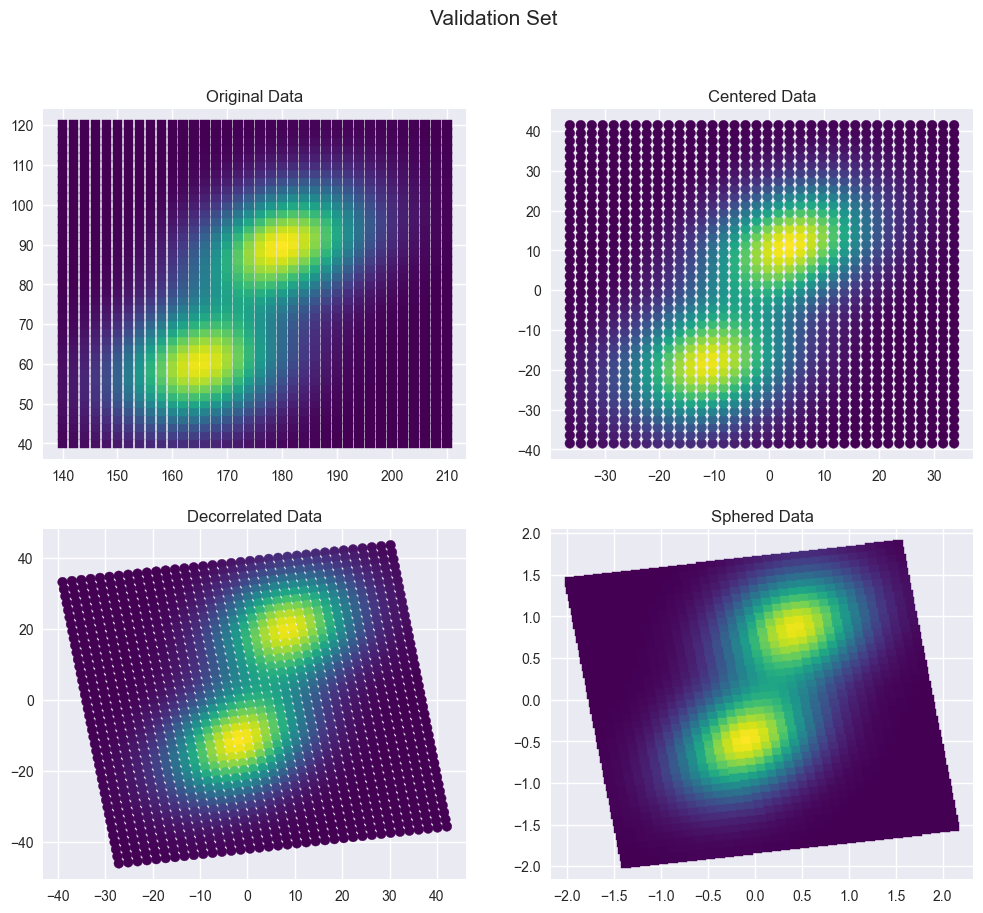

x_test_sphered mean: [ 0. -0.]
x_test_sphered std: [1. 1.]


In [14]:
# Plot of the data
plt.style.use('seaborn')

fig = plt.figure(figsize=(12,10))
fig.suptitle('Validation Set', fontsize=15)

# #Original data
ax1 = fig.add_subplot(221)
ax1.scatter(x_validate[:,0], x_validate[:,1], c=yT_validate, marker = 's' ,cmap='viridis')
ax1.title.set_text('Original Data')

#Centered data
ax2 = fig.add_subplot(222)  
ax2.scatter(x_test_center[:,0], x_test_center[:,1], c=yT_validate, cmap='viridis')
ax2.title.set_text('Centered Data')

#Decorrelated data
ax3 = fig.add_subplot(223)  
ax3.scatter(x_test_decorrelate[0,:], x_test_decorrelate[1,:], c=yT_validate, cmap='viridis') 
ax3.title.set_text('Decorrelated Data')

#Whitened data
ax4 = fig.add_subplot(224) 
ax4.scatter(x_test_sphere.T[:,0], x_test_sphere.T[:,1], marker = 's', c=yT_validate.T, cmap='viridis')
ax4.title.set_text('Sphered Data')

plt.show()

#properties of the data after whitening/sphering
print(f'x_test_sphered mean: {np.round(np.mean(x_test_sphere, axis=1))}')
print(f'x_test_sphered std: {np.round(np.std(x_test_sphere, axis=1))}')

##### Teil B
Feature Expansion: A single linear neuron is not able to predict the target labels very well. To increase the representational power of the model class, expand the sphered 2D input to all possible monomials up to degree 9.
Here, a monomial of order k corresponds to a term x1^lx2^m with l + m = k.
The model should contain all 55 terms x1^lx2^m with l + m = k for k = 0, 1, ..., 9. These
monomials can be enumerated by i = 1, . . . , d = 55 defining φi(x). The prediction function
which feeds into the quadratic cost measure ET is given by


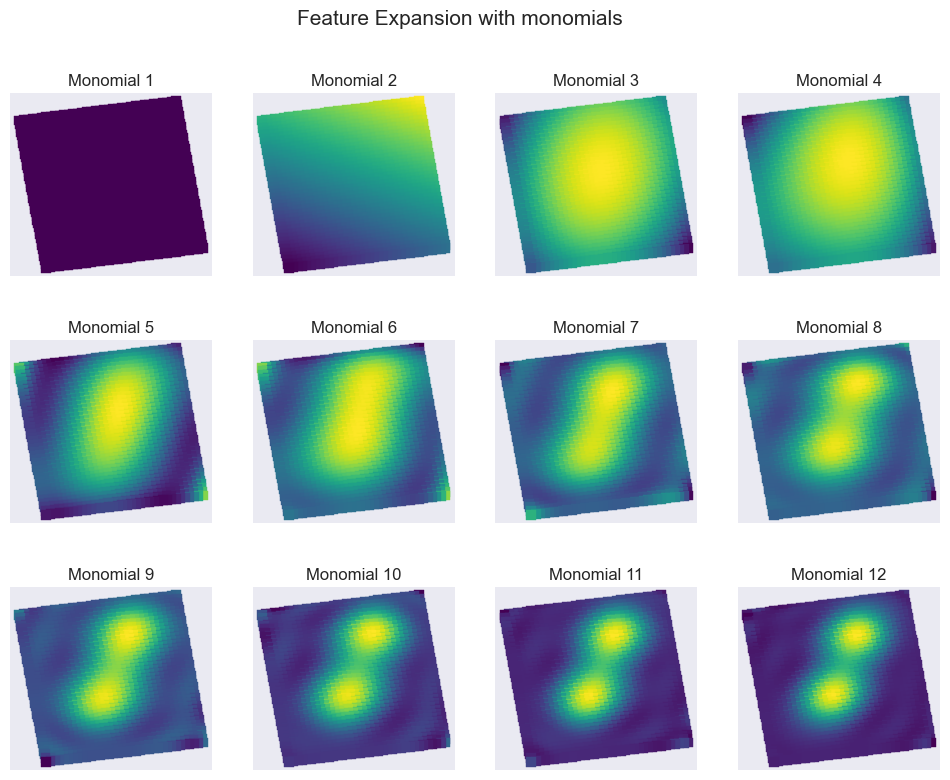

In [15]:
# demonstrate the types of features created
from sklearn.preprocessing import PolynomialFeatures

#Using the validation set to test the monomial expansion for feature expansion

fig = plt.figure(figsize=(12,12))
fig.suptitle('Feature Expansion with monomials', fontsize=15, y=0.95)
y_regression = []

for i in range(12):
    #Performing the polynomial transformation with monomials
    poly = PolynomialFeatures(degree=i)
    x_poly = poly.fit_transform(x_test_sphere.T).T #transposing the data to get the correct shape
    # print(f'x_poly {i}: {x_poly.shape}')
    
    phi = x_poly
    
    w = np.linalg.inv(phi @ phi.T)@ phi @ yT_validate.T
    # w = w.reshape(-1,1)
    y_predicted = w.T @ phi
    y_regression.append(np.array(y_predicted))
    
    ax = fig.add_subplot(4,4,i+1)
    
    #Plotting the data
    
    # #Normal data
    # ax.scatter(x_validate[:,0], x_validate[:,1], c=y_predicted, cmap='viridis')
    
    # Sphered data 
    ax.scatter(x_test_sphere[0,:], x_test_sphere[1,:], c=y_predicted, cmap='viridis', marker = 's')
    
    #remove the ticks
    ax.set_xticks([])
    ax.set_yticks([])
    
    ax.title.set_text(f'Monomial {i+1}')
plt.subplots_adjust(hspace=0.35)

#frage: eigenvalues =0, weil die daten nicht zentriert sind? -> ja, aber dann ist die matrix nicht invertierbar
#problem with the diagonal matrix **-1/2 -> not invertible

In [16]:
for i in range(10):
    #Performing the polynomial transformation with monomials
    poly = PolynomialFeatures(degree=i)
    x_poly = poly.fit_transform(x_test_sphere.T).T 
    print(f'x_poly {i}: {x_poly.shape}')
    # print(np.linalg.inv(x_poly@x_poly.T))

x_poly 0: (1, 1476)
x_poly 1: (3, 1476)
x_poly 2: (6, 1476)
x_poly 3: (10, 1476)
x_poly 4: (15, 1476)
x_poly 5: (21, 1476)
x_poly 6: (28, 1476)
x_poly 7: (36, 1476)
x_poly 8: (45, 1476)
x_poly 9: (55, 1476)


##### Teil C

The best regularization coefficient is: 0.07943282347242862


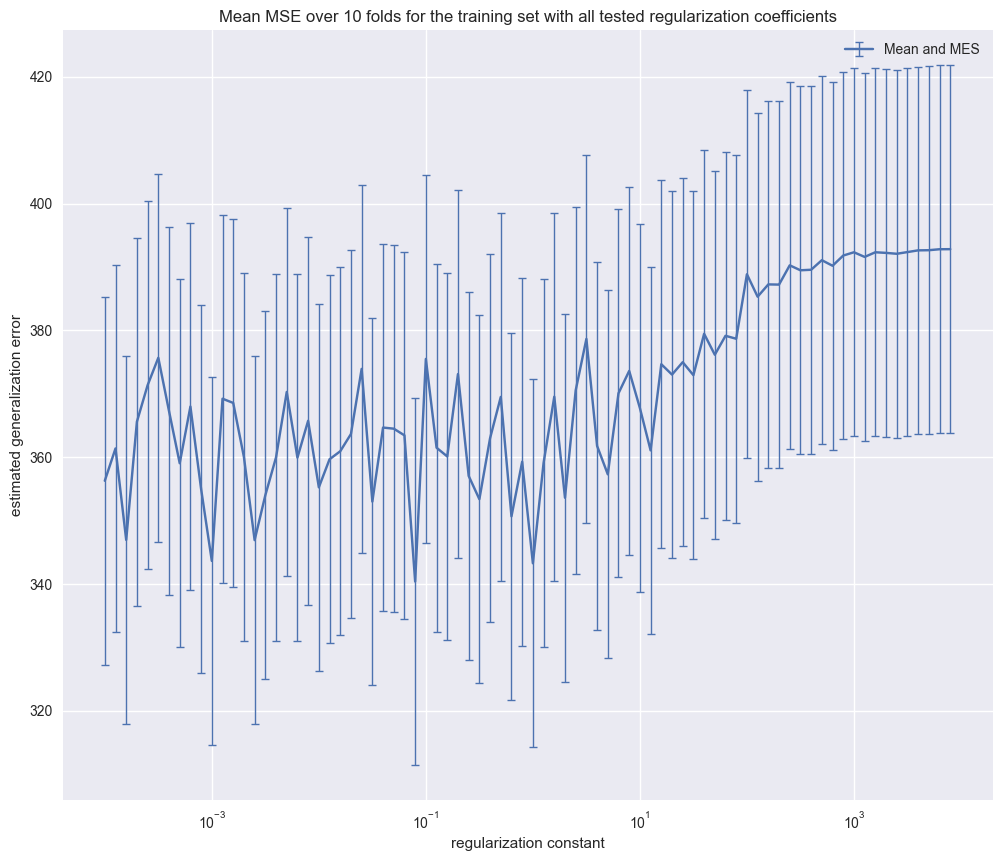

In [35]:
#cross  validation
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error


#create matrix  from -4 to 4 with step 0.1 for regularization coefficient
x = np.arange(-4, 4, 0.1)
r_coefficient = np.array([10**i for i in x])


#cross validation
kf = KFold(n_splits=10, shuffle=True)

#performing the cross validation
MSE = []
MEAN = []
for r in r_coefficient:
    MSE_r = []
    for train_index, test_index in kf.split(x_train):
        # print("TRAIN:", train_index, "TEST:", test_index)
        x_train_cv, x_test_cv = x_train[train_index], x_train[test_index]
        y_train_cv, y_test_cv = yT_train[train_index], yT_train[test_index]
        
        #Training set 
        
        #Centering the data 
        x_train_center_cross = x_train_cv - np.mean(x_train_cv, axis=0)
        C_cross = np.cov(x_train_center_cross, rowvar=False)
        
        #Computing the eigenvalues and eigenvectors

        λ_cross, E_cross = LA.eig(C_cross) #eigenvalues are sorted in ascending order (eigenvalues/eigenvectors are sorted by column)
        #diagonal matrix of eigenvalues
        λ_cross = np.diag(1/np.sqrt(λ_cross))
        λ_cross = λ_cross.real.round(4)
        
        #Use the eigenvectors with the validation set
        
        x_test_center_cross = x_test_cv - np.mean(x_train_cv, axis=0)
        x_test_decorrelate_cross = E_cross.T@x_test_center_cross.T
        x_test_sphere_cross = λ_cross@x_test_decorrelate_cross
        
        phi_cross = x_test_sphere_cross
        
        w_cross = np.linalg.inv(phi_cross @ phi_cross.T + r*np.identity(phi_cross.shape[0]))@ phi_cross @ y_test_cv.T
        y_predicted_cross = w_cross.T @ phi_cross
        
        MSE_r.append(mean_squared_error(y_test_cv, y_predicted_cross))  

    MSE.append(MSE_r) 
    
    MEAN.append(np.mean(MSE_r))  
MSE = np.array(MSE) 
MEAN = np.array(MEAN)


fig = plt.figure(figsize=(12,10))  

ax = fig.add_subplot(111)
ax.errorbar(r_coefficient, MEAN, yerr=np.argmin(MEAN), label='Mean and MES', capsize=3, capthick=1, elinewidth=1) 
ax.title.set_text('Mean MSE over 10 folds for the training set with all tested regularization coefficients')
#scale from 10^-4 to 10^4 in x axis
ax.set_xscale('log')
ax.set_xlabel('regularization constant')
ax.set_ylabel('estimated generalization error')
ax.legend()

#print the best regularization coefficient
print(f'The best regularization coefficient is: {r_coefficient[np.argmin(MEAN)]}')


In [33]:
### Doubt: is the data normalized? if not --> where and how should I normalize it?
#Antwort: the regularization coefficient inside the w_cross is the one who regularizes the data

# keep record of the MSE for each regularization coefficient and know how to plot it for the target function and also the predicted function (for the training set and the validation set)

#Should I use the same eigenvectors for the validation set? or should I use the eigenvectors of the training set?, if yes, how do I know which eigenvectors to use?
# how do keep track of them with each iteration of the cross validation?

# Should we just take best regularization coefficient and use it for the validation set? or should we use the best regularization coefficient for each iteration of the cross validation?
# there are two regularization coefficients. The first one evaluated just for the training set and the second one for the train and validation set (cross validation)
